# „Hello World“ des Machine Learning – Zeichenerkennung

Das Erkennen von handgeschriebenen Ziffern ist ein gut untersuchtes **Klassifikationsproblem**, zu dem es mehrere frei verfügbare Datensätze gibt.
Der bekannteste Datensatz ist der [MNIST](https://en.wikipedia.org/wiki/MNIST_database) Datensatz mit 60.000 Trainings- und 10.000 Testbeispielen. Der Datensatz stammt aus den USA, was sich insbesondere auf die Schreibweise der 1 und der 7 auswirkt.

Daneben bringt `scikit-learn` einen kleineren Datensatz mit 1797 Beispielen von der [University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) mit, der ursprünglich von der Boğaziçi Üniversitesi in Istanbul stammt. 

Dieser kleinere Datensatz eignet sich gut für erste Experimente, außerdem kann man im Vergleich den Einfluß der Trainingsdatenmenge auf die Performance verschiedener Verfahren demonstrieren.

In [1]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm, metrics, datasets

In [2]:
digits = sklearn.datasets.load_digits()

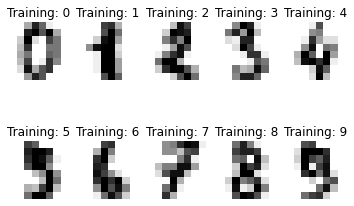

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label:d}')

In [4]:
n_samples = len(digits.images)
n_samples

1797

## Umformen der Bilder in Feature-Vektoren

Die Bilddaten liegen als `n_samples` 8x8-Matrizen vor. Für die Klassifikation wandeln wir die 8x8-Matrizen 
jeweils in einen 64-dimensionalen Vektor um.
Dazu verwenden wir die Methode `reshape()`.

In [5]:
print(f'shape: {digits.images.shape}')
data = digits.images.reshape((n_samples, -1))
print(f'new shape: {data.shape}')

shape: (1797, 8, 8)
new shape: (1797, 64)


## Zerlegung der Daten in Trainings- und Testdaten

In [6]:
(X_train, X_test, y_train, y_test ) = \
  sklearn.model_selection.train_test_split(data, digits.target, train_size=0.7)

print(f"train set: {len(X_train)}, test set: {len(X_test)}")

train set: 1257, test set: 540


## Training eines Klassifikators

Als Klassifikator verwenden wir eine Support Vector Machine (svm).

In [7]:
classifier = svm.SVC(gamma=0.001)

In [8]:
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [9]:
def evaluate(classifier, verbose=False):
    """ Print evaluation data for the classifier """
    predicted = classifier.predict(X_test)
    if verbose:
        print(f"Classification report for classifier {classifier}:")
        print(f"{metrics.classification_report(y_test, predicted)}")
        print(f"Confusion matrix:\n{metrics.confusion_matrix(y_test, predicted)}")
    
    return metrics.f1_score(y_test, predicted, average="weighted")

evaluate(classifier, verbose=True)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.96      1.00      0.98        54
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        63
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        52
           8       1.00      0.96      0.98        52
           9       1.00      0.98      0.99        46

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

Confusion matrix:
[[56  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  0  0  0]
 [ 

0.9944404469894667

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

classifiers = [ DecisionTreeClassifier(),
                KNeighborsClassifier(),
                MLPClassifier(verbose=True),
                svm.SVC(gamma=0.001)
              ]

scores = {}

for classifier in classifiers:
    print(f"Training: {classifier.__class__.__name__}")
    classifier.fit(X_train, y_train)
    scores[classifier] = evaluate(classifier)
    
for (c, score) in sorted(scores.items(), key=lambda p: p[1], reverse=True):
    print(f"{c.__class__.__name__:25s}: {score:.3f}")

Training: DecisionTreeClassifier
Training: KNeighborsClassifier
Training: MLPClassifier
Iteration 1, loss = 0.46581552
Iteration 2, loss = 0.22363933
Iteration 3, loss = 0.17003841
Iteration 4, loss = 0.13800446
Iteration 5, loss = 0.11436033
Iteration 6, loss = 0.09704414
Iteration 7, loss = 0.08381902
Iteration 8, loss = 0.07291592
Iteration 9, loss = 0.06436108
Iteration 10, loss = 0.05683872
Iteration 11, loss = 0.05039176
Iteration 12, loss = 0.04422352
Iteration 13, loss = 0.03991314
Iteration 14, loss = 0.03524507
Iteration 15, loss = 0.03172131
Iteration 16, loss = 0.02831892
Iteration 17, loss = 0.02537594
Iteration 18, loss = 0.02264707
Iteration 19, loss = 0.02007700
Iteration 20, loss = 0.01781797
Iteration 21, loss = 0.01631636
Iteration 22, loss = 0.01432054
Iteration 23, loss = 0.01293943
Iteration 24, loss = 0.01208542
Iteration 25, loss = 0.01048990
Iteration 26, loss = 0.00926105
Iteration 27, loss = 0.00816290
Iteration 28, loss = 0.00759651
Iteration 29, loss = 0.00

## Training mit größerem Datensatz

Bei [openml.org](https://www.openml.org/d/554) gibt es eine größere Variante des Datensatzes.

In [12]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

( X_train, X_test, y_train, y_test ) = \
  sklearn.model_selection.train_test_split(X, y, train_size=0.7)

len(X_train)

49000

In [20]:
import pickle

with open("models.pkl", "wb") as file:
    pickle.dump(scores, file)

with open("models.pkl", "rb") as file:
    scores = pickle.load(file)

for (c, score) in sorted(scores.items(), key=lambda p: p[1], reverse=True):
    print(f"{c.__class__.__name__:25s}: {score:.3f}")

KNeighborsClassifier     : 0.987
MLPClassifier            : 0.967


In [21]:
scores

{KNeighborsClassifier(): 0.9870384255161971,
 MLPClassifier(): 0.9667630883820678}

In [23]:
(c, s) = [(p[0], p[1]) for p in scores.items()][0]

evaluate(c, verbose=True)

ValueError: query data dimension must match training data dimension

49000